In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [3]:
np.random.seed(1)
dataset = []
for i in range(100):
    dataset.append([np.random.uniform(low=0.4,high=4.3),np.random.uniform(low=0.4,high=4.3),np.random.randint(0,2)])

In [4]:
dataset = np.asarray(dataset)

In [5]:
dataset.shape

(100, 3)

In [6]:
dataset[1]

array([0.89968535, 4.29625801, 0.        ])

In [7]:
y = dataset[:,2]

In [8]:
X = np.column_stack((dataset[:,0],dataset[:,1]))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [10]:
step = 0.5
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

In [11]:
figure = plt.figure(figsize=(6, 6))

<Figure size 432x432 with 0 Axes>

[]

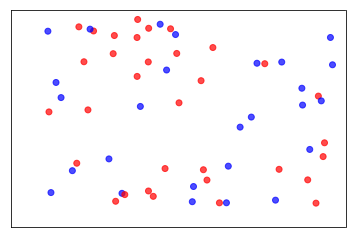

In [12]:
# just plot the dataset first
cm = plt.cm.jet
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

In [13]:
def train_model(x_train,y_train,layer_shape,optimizer):
    # layer shape is in a python list [20,20,20]
    #solver options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
    model = MLPClassifier(hidden_layer_sizes=(layer_shape), max_iter=6000, alpha=0.000000001,
                         solver=optimizer, verbose=False,random_state=21,tol=0.000000001,learning_rate="adaptive")
    model.fit(x_train, y_train)
    return model

In [14]:
#optimizer options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’ for MLPClassifier and regressor
optimizer = 'adam'
layer_shape = [30,30]
clf = train_model(X_train,y_train,layer_shape,optimizer)


In [15]:
score = clf.score(X_test, y_test)

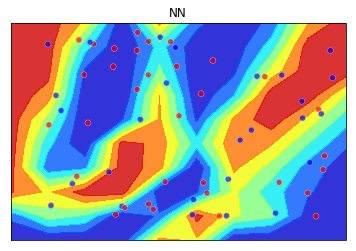

In [16]:
# just plot the dataset first
cm = plt.cm.jet
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)

# Plot also the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
# and testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           #alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("NN")
#ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
#        size=15, horizontalalignment='right')

figure.subplots_adjust(left=.02, right=.98)
plt.show()